In [2]:
! pip install tweepy stylecloud -q

     |████████████████████████████████| 161 kB 5.3 MB/s 
     |████████████████████████████████| 87 kB 5.1 MB/s 
     |████████████████████████████████| 87 kB 4.7 MB/s 


In [3]:
consumer_key = "xxxxxxx"
consumer_secret = "xxxxxx"
access_token = "xxxxxxxx"
access_token_secret = "xxxxxxx"

In [5]:
import tweepy

In [13]:
import pandas as pd

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [8]:
username = 'philipvollet'

In [9]:
tweets = api.user_timeline(screen_name= username, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = True,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [14]:
json_data = [r._json for r in tweets]

df = pd.json_normalize(json_data)

In [60]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,quoted_status_id,quoted_status_id_str,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.url.urls,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,...,quoted_status.user.lang,quoted_status.user.contributors_enabled,quoted_status.user.is_translator,quoted_status.user.is_translation_enabled,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_banner_url,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.has_extended_profile,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.following,quoted_status.user.follow_request_sent,quoted_status.user.notifications,quoted_status.user.translator_type,quoted_status.user.withheld_in_countries,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.quoted_status_permalink.url,quoted_status.quoted_status_permalink.expanded,quoted_status.quoted_status_permalink.display
0,Wed Dec 29 18:39:58 +0000 2021,1476261729835569157,1476261729835569157,RT @DrCMcMaster: Thanks to @explosion_ai for h...,False,"[0, 140]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,None,None,None,None,True,1.475869e+18,1475869231552020480,2,0,False,False,en,[],[],"[{'screen_name': 'DrCMcMaster', 'name': 'Chris...",[],421795636,421795636,Philip Vollet,philipvollet,"Berlin, Germany","I tweet about open source, machine learning & ...",https://t.co/ldgzxjp2Hu,"[{'url': 'https://t.co/ldgzxjp2Hu', 'expanded_...",[],False,18470,3120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Dec 29 18:39:38 +0000 2021,1476261643332071425,1476261643332071425,RT @4_sin: https://t.co/Kbvurgqj0a,False,"[0, 34]","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,None,None,None,None,False,NaN,NaN,2457,0,False,False,und,[],[],"[{'screen_name': '4_sin', 'name': '𝖲𝖨𝖭', 'id':...",[],421795636,421795636,Philip Vollet,philipvollet,"Berlin, Germany","I tweet about open source, machine learning & ...",https://t.co/ldgzxjp2Hu,"[{'url': 'https://t.co/ldgzxjp2Hu', 'expanded_...",[],False,18470,3120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed Dec 29 18:03:09 +0000 2021,1476252462835187712,1476252462835187712,RT @spacy_io: 🧪 Cutting-edge experimental spaC...,False,"[0, 140]","<a href=""https://hypefury.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,None,None,None,None,False,NaN,NaN,7,0,False,False,en,[],[],"[{'screen_name': 'spacy_io', 'name': 'spaCy', ...",[],421795636,421795636,Philip Vollet,philipvollet,"Berlin, Germany","I tweet about open source, machine learning & ...",https://t.co/ldgzxjp2Hu,"[{'url': 'https://t.co/ldgzxjp2Hu', 'expanded_...",[],False,18

In [22]:
df['full_text'].to_csv("tweets.csv",index = False) 

In [16]:
import stylecloud 

In [76]:
stylecloud.gen_stylecloud(file_path='tweets.csv',
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.qualitative.Paired_3', #https://jiffyclub.github.io/palettable/
                          background_color='white',
                          gradient='horizontal',
                          stopwords = True,
                          custom_stopwords=['philipvollet','RT','THE','IS','WITH','ON','THIS','HTTPS','CO','TO','AND','OF','IT','MY','FOR','IN','a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',          'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he',                          'her', 'here',           'hers', 'herself', 'him', 'himself', 'his', 'how',          'i',                               'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other',          'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she',                    "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll",           'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there',            'these', 'they',                                            'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',                                    'were', 'weren', "weren't", 'what',           'when',           'where',            'which', 'while', 'who',          'whom', 'why', 'will',          'with', 'won', "won't",          'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
)

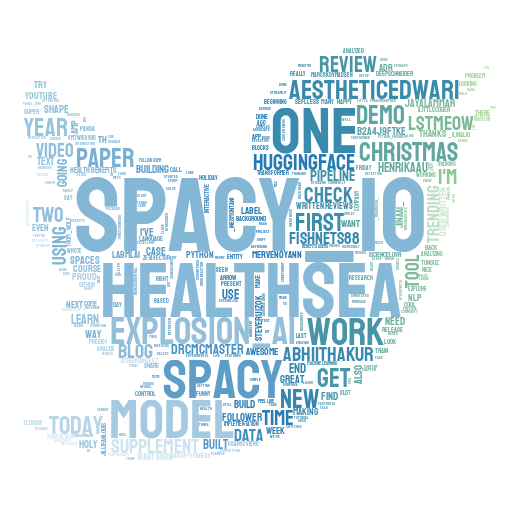

In [77]:
from IPython.display import Image
Image('stylecloud.png')